## First Method I tried

#### Importing libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

#### Read dataset

In [4]:
df = pd.read_csv("Fraud.csv")

In [5]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
165434,12,PAYMENT,4149.07,C2001802076,0.0,0.00,M1708280162,0.0,0.0,0.0,0.0
165435,12,PAYMENT,20934.94,C150264052,0.0,0.00,M806755072,0.0,0.0,0.0,0.0
165436,12,CASH_OUT,122832.41,C1327637933,23958.0,0.00,C475670359,11507.0,0.0,0.0,0.0
165437,12,CASH_IN,424626.95,C944569458,58972.0,483598.95,C929611695,0.0,0.0,0.0,0.0


##### Here the "isFlagged" is removed as it has only 1 value i.e, 0 and is unecessary

In [6]:
df.drop(["isFlaggedFraud"], axis=1, inplace=True)


In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
165434,12,PAYMENT,4149.07,C2001802076,0.0,0.00,M1708280162,0.0,0.0,0.0
165435,12,PAYMENT,20934.94,C150264052,0.0,0.00,M806755072,0.0,0.0,0.0
165436,12,CASH_OUT,122832.41,C1327637933,23958.0,0.00,C475670359,11507.0,0.0,0.0
165437,12,CASH_IN,424626.95,C944569458,58972.0,483598.95,C929611695,0.0,0.0,0.0


In [8]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [9]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
165434,12,PAYMENT,4149.07,C2001802076,0.0,0.00,M1708280162,0.0,0.0,0.0
165435,12,PAYMENT,20934.94,C150264052,0.0,0.00,M806755072,0.0,0.0,0.0
165436,12,CASH_OUT,122832.41,C1327637933,23958.0,0.00,C475670359,11507.0,0.0,0.0
165437,12,CASH_IN,424626.95,C944569458,58972.0,483598.95,C929611695,0.0,0.0,0.0
165438,12,PAYMENT,35864.56,C382841079,63909.0,28044.44,M,NaN,NaN,NaN


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [11]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

0 means legal transaction and 1 means fraudulent transaction
is clearly seen that the number of legal transactions is way more than the number of fraudulent transactions which makes it an imbalanced dataset
Hence we need to balance it

In [12]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,165305
1.0,133


In [13]:
legit = df[df["isFraud"]==0]
fraud = df[df["isFraud"]==1]

We shall make the number of legal transactions equal to the number of fraudulent transactions to make it even

In [14]:
legit = legit.sample(n=8213)

In [15]:
legit.shape, fraud.shape

((8213, 10), (133, 10))

Now they are equal

In [16]:
new_df = pd.concat([legit, fraud], axis=0)

In [17]:
new_df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
151605,12,CASH_OUT,38472.25,C2069170643,105.00,0.00,C416078784,1067673.47,1046237.25,0.0
27670,8,PAYMENT,5087.15,C358856403,11371.00,6283.85,M370730963,0.00,0.00,0.0
97273,10,CASH_IN,135517.59,C644290785,5423684.81,5559202.40,C120155529,202942.30,0.00,0.0
40430,9,PAYMENT,17743.09,C61687116,37600.00,19856.91,M1772911991,0.00,0.00,0.0
98903,10,TRANSFER,407922.87,C1608239369,76658.00,0.00,C587879168,13240785.31,14586852.70,0.0
...,...,...,...,...,...,...,...,...,...,...
146628,12,CASH_OUT,19472.00,C1205151454,19472.00,0.00,C664770316,0.00,19472.00,1.0
151657,12,TRANSFER,3964129.99,C576568419,3964129.99,0.00,C1571546632,0.00,0.00,1.0
151658,12,CASH_OUT,3964129.99,C1098250442,3964129.99,0.00,C1140712423,1912955.54,5811064.07,1.0
151924,12,TRANSFER,1041647.06,C345293642,1041647.06,0.00,C937194908,0.00,0.00,1.0


In [18]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
151605,12,CASH_OUT,38472.25,C2069170643,105.00,0.00,C416078784,1067673.47,1046237.25,0.0
27670,8,PAYMENT,5087.15,C358856403,11371.00,6283.85,M370730963,0.00,0.00,0.0
97273,10,CASH_IN,135517.59,C644290785,5423684.81,5559202.40,C120155529,202942.30,0.00,0.0
40430,9,PAYMENT,17743.09,C61687116,37600.00,19856.91,M1772911991,0.00,0.00,0.0
98903,10,TRANSFER,407922.87,C1608239369,76658.00,0.00,C587879168,13240785.31,14586852.70,0.0


In [19]:
new_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
146628,12,CASH_OUT,19472.00,C1205151454,19472.00,0.0,C664770316,0.00,19472.00,1.0
151657,12,TRANSFER,3964129.99,C576568419,3964129.99,0.0,C1571546632,0.00,0.00,1.0
151658,12,CASH_OUT,3964129.99,C1098250442,3964129.99,0.0,C1140712423,1912955.54,5811064.07,1.0
151924,12,TRANSFER,1041647.06,C345293642,1041647.06,0.0,C937194908,0.00,0.00,1.0
151925,12,CASH_OUT,1041647.06,C169939918,1041647.06,0.0,C1673501963,52730.33,1094377.39,1.0


In [20]:
new_df["isFraud"].value_counts()

,count
isFraud,
0.0,8213
1.0,133


In [21]:
new_df.to_csv('balanced_dataset.csv', index=False, encoding='utf-8')

In [22]:
corr = df.corr(numeric_only=True)

In [23]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.055731,-0.006090,-0.005804,0.020465,0.006953,-0.044940
amount,0.055731,1.000000,-0.018342,-0.023154,0.226717,0.352507,0.036147
oldbalanceOrg,-0.006090,-0.018342,1.000000,0.998971,0.096140,0.065275,-0.002860
newbalanceOrig,-0.005804,-0.023154,0.998971,1.000000,0.097666,0.064259,-0.008740
oldbalanceDest,0.020465,0.226717,0.096140,0.097666,1.000000,0.948776,-0.008267
newbalanceDest,0.006953,0.352507,0.065275,0.064259,0.948776,1.000000,-0.005302
isFraud,-0.044940,0.036147,-0.002860,-0.008740,-0.008267,-0.005302,1.000000


<Axes: >

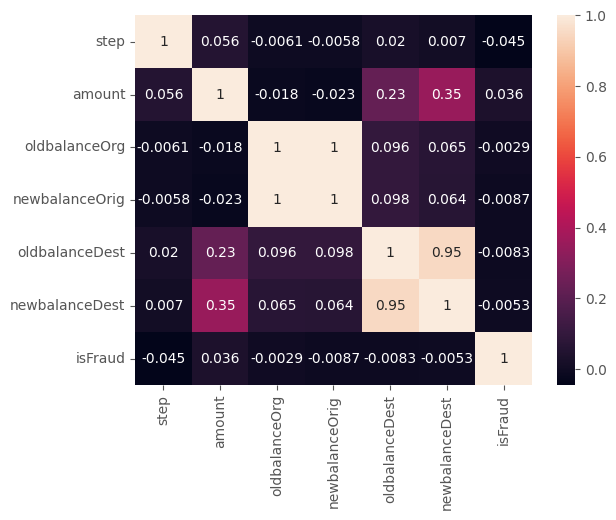

In [24]:
sns.heatmap(corr, annot=True)

#### Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

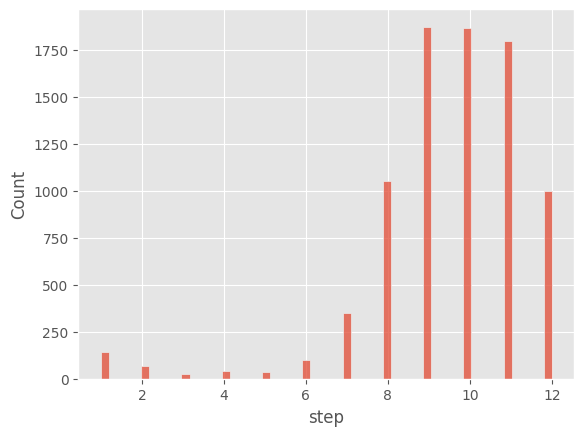

In [25]:
sns.histplot(data=new_df, x="step")

<Axes: xlabel='step'>

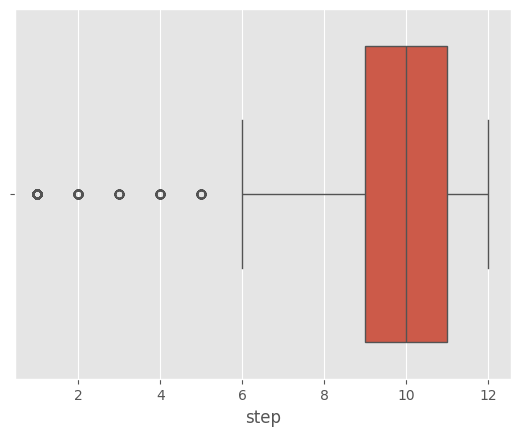

In [26]:
sns.boxplot(data=new_df, x="step")

<Axes: xlabel='type', ylabel='count'>

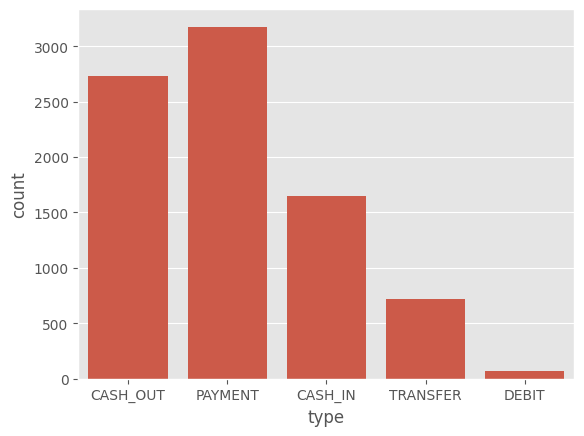

In [27]:
sns.countplot(data=new_df, x="type")

<Axes: xlabel='amount', ylabel='Count'>

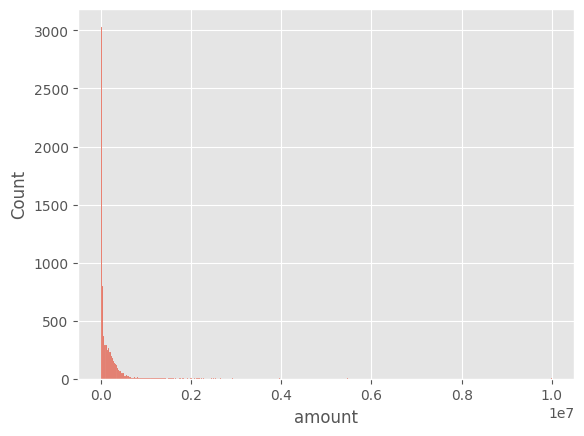

In [28]:
sns.histplot(data=new_df, x="amount")

<Axes: xlabel='amount'>

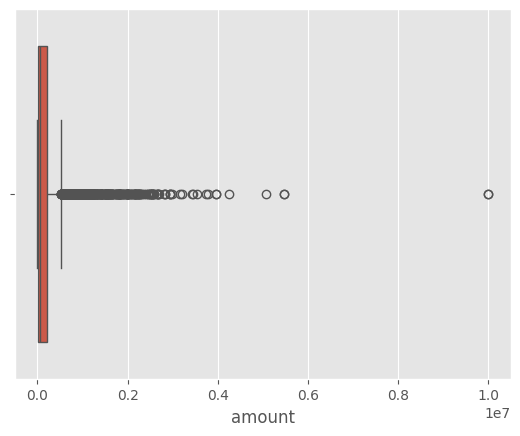

In [29]:
sns.boxplot(data=new_df, x="amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

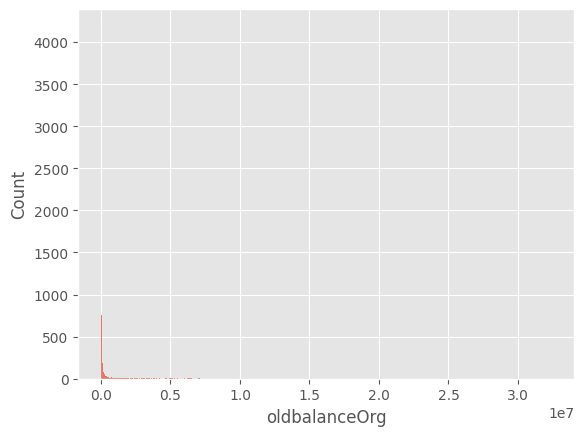

In [30]:
sns.histplot(data=new_df, x="oldbalanceOrg")

In [31]:
df["nameDest"].value_counts()

,count
nameDest,
C985934102,80
C1286084959,79
C1590550415,74
C248609774,74
C2083562754,73
...,...
C847022150,1
C837981223,1
C1088012084,1


<Axes: xlabel='oldbalanceDest'>

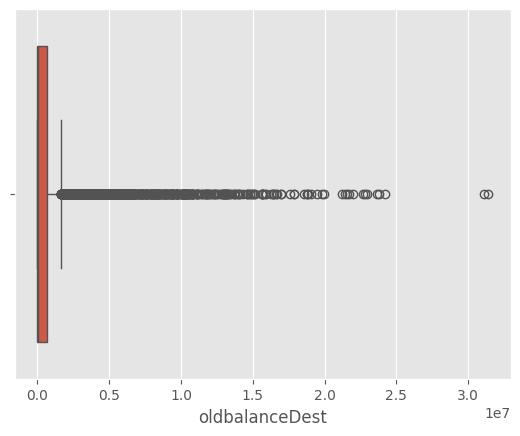

In [32]:
sns.boxplot(data=new_df, x="oldbalanceDest")

<Axes: xlabel='newbalanceDest'>

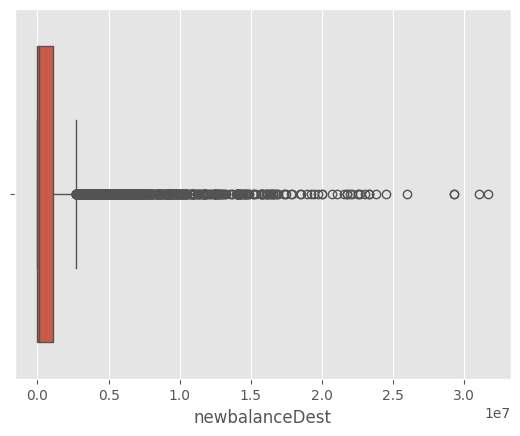

In [33]:
sns.boxplot(data=new_df, x="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

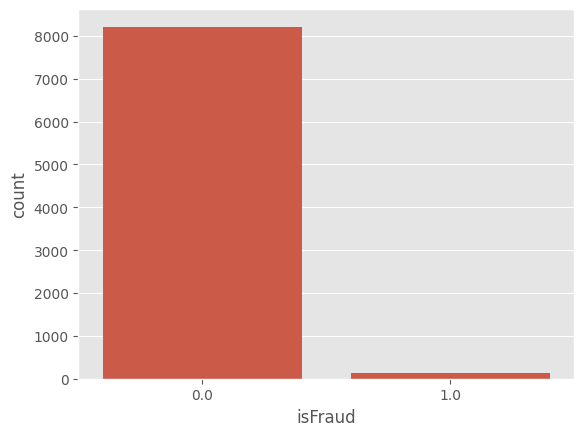

In [34]:
sns.countplot(data=new_df, x="isFraud")

<Axes: xlabel='type', ylabel='count'>

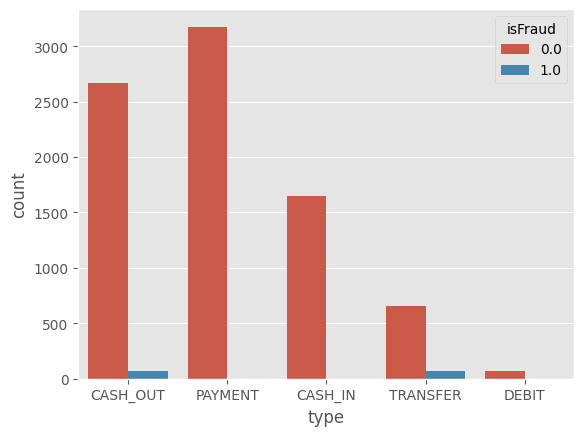

In [35]:
sns.countplot(data=new_df, x="type", hue="isFraud")

#### Descriptive analysis

In [36]:
new_df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,8346.000000,8346,8.346000e+03,8346,8.346000e+03,8.346000e+03,8346,8.346000e+03,8.346000e+03,8346.000000
unique,NaN,5,NaN,8346,NaN,NaN,7319,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C169939918,NaN,NaN,C1060041730,NaN,NaN,NaN
freq,NaN,3175,NaN,1,NaN,NaN,6,NaN,NaN,NaN
mean,9.514019,NaN,1.774283e+05,NaN,8.334731e+05,8.401058e+05,NaN,8.725354e+05,1.127089e+06,0.015936
std,2.024620,NaN,3.724291e+05,NaN,2.617245e+06,2.646871e+06,NaN,2.270496e+06,2.591464e+06,0.125235
min,1.000000,NaN,1.580000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,9.000000,NaN,1.103937e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,10.000000,NaN,5.979133e+04,NaN,2.024050e+04,0.000000e+00,NaN,2.180550e+04,8.246655e+04,0.000000
75%,11.000000,NaN,2.179510e+05,NaN,2.058798e+05,2.235593e+05,NaN,6.587537e+05,1.074085e+06,0.000000


In [37]:
new_df.shape

(8346, 10)

In [38]:
new_df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [39]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
151605,12,CASH_OUT,38472.25,105.00,0.00,1067673.47,1046237.25,0.0
27670,8,PAYMENT,5087.15,11371.00,6283.85,0.00,0.00,0.0
97273,10,CASH_IN,135517.59,5423684.81,5559202.40,202942.30,0.00,0.0
40430,9,PAYMENT,17743.09,37600.00,19856.91,0.00,0.00,0.0
98903,10,TRANSFER,407922.87,76658.00,0.00,13240785.31,14586852.70,0.0


In [40]:
new_df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
146628,12,CASH_OUT,19472.00,19472.00,0.0,0.00,19472.00,1.0
151657,12,TRANSFER,3964129.99,3964129.99,0.0,0.00,0.00,1.0
151658,12,CASH_OUT,3964129.99,3964129.99,0.0,1912955.54,5811064.07,1.0
151924,12,TRANSFER,1041647.06,1041647.06,0.0,0.00,0.00,1.0
151925,12,CASH_OUT,1041647.06,1041647.06,0.0,52730.33,1094377.39,1.0


#### Checking null values

In [41]:
new_df.isnull().any()

,0
step,False
type,False
amount,False
oldbalanceOrg,False
newbalanceOrig,False
oldbalanceDest,False
newbalanceDest,False
isFraud,False


In [42]:
new_df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


#### Clearly there are no null values

In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8346 entries, 151605 to 151925
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8346 non-null   int64  
 1   type            8346 non-null   object 
 2   amount          8346 non-null   float64
 3   oldbalanceOrg   8346 non-null   float64
 4   newbalanceOrig  8346 non-null   float64
 5   oldbalanceDest  8346 non-null   float64
 6   newbalanceDest  8346 non-null   float64
 7   isFraud         8346 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 586.8+ KB


#### Handling outliers

In [44]:
q1 = new_df['amount'].quantile(0.25)
q3 = new_df['amount'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['amount'].mean()

# Replace outliers with the mean value
new_df['amount'] = np.where(new_df['amount'] > upper_limit, mean, new_df['amount'])
new_df['amount'] = np.where(new_df['amount'] < lower_limit, mean, new_df['amount'])

In [45]:
q1 = new_df['oldbalanceOrg'].quantile(0.25)
q3 = new_df['oldbalanceOrg'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['oldbalanceOrg'].mean()

# Replace outliers with the mean value
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] > upper_limit, mean, new_df['oldbalanceOrg'])
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] < lower_limit, mean, new_df['oldbalanceOrg'])

In [46]:
q1 = new_df['newbalanceOrig'].quantile(0.25)
q3 = new_df['newbalanceOrig'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['newbalanceOrig'].mean()

# Replace outliers with the mean value
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] > upper_limit, mean, new_df['newbalanceOrig'])
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] < lower_limit, mean, new_df['newbalanceOrig'])

#### Handling categorial or object data using label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

We encoded the categorical variable type into numeric format using Label Encoding so it can be used by machine learning models. Alternatively, One-Hot Encoding can also be applied to avoid implicit ordering of categories

In [48]:
le = LabelEncoder()

new_df["type"] = le.fit_transform(new_df["type"])

In [49]:
new_df["type"].value_counts()

,count
type,
3,3175
1,2735
0,1649
4,718
2,69


In [50]:
le.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [51]:
map = dict(zip(le.classes_, range(len(le.classes_))))

In [52]:
map

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

In [53]:
x = new_df.drop("isFraud", axis=1)
y = new_df["isFraud"]

### Checking Multicollinearity We use correlation heatmap and VIF to check whether features are highly correlated.

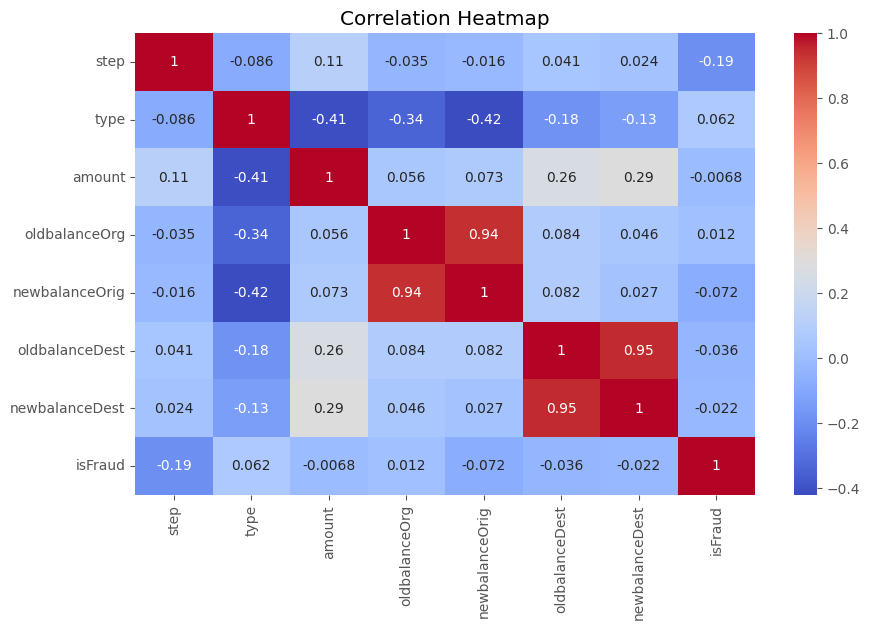

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = new_df[['oldbalanceDest', 'newbalanceDest']]  # or all numerical features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


          feature        VIF
0  oldbalanceDest  10.685569
1  newbalanceDest  10.685569


In [56]:
new_df = new_df.drop('newbalanceDest', axis=1)  # if you choose to keep old_balance_dest


In [57]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
151605,12,1,38472.25,105.000000,0.000000,1067673.47,1046237.25
27670,8,3,5087.15,11371.000000,6283.850000,0.00,0.00
97273,10,0,135517.59,833473.086627,840105.834728,202942.30,0.00
40430,9,3,17743.09,37600.000000,19856.910000,0.00,0.00
98903,10,4,407922.87,76658.000000,0.000000,13240785.31,14586852.70


In [58]:
y.head()

,isFraud
151605,0.0
27670,0.0
97273,0.0
40430,0.0
98903,0.0


#### Splitting data into training and testing set

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(6676, 7)
(1670, 7)
(1670,)
(6676,)


#### Model building

#### Now that our data is clean, we can train it on different models and pick the best performing model

#### 1. Random forest classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [64]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict1)
test_accuracy

0.9916167664670659

In [66]:
y_train_predict1 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict1)
train_accuracy

1.0

#### Evaluating performance of the model

In [67]:
pd.crosstab(y_test, y_test_predict1)

col_0,0.0,1.0
isFraud,,
0.0,1640,4
1.0,10,16


In [68]:
from sklearn.metrics import classification_report


In [69]:
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1644
         1.0       0.80      0.62      0.70        26

    accuracy                           0.99      1670
   macro avg       0.90      0.81      0.85      1670
weighted avg       0.99      0.99      0.99      1670



#### 2. Decision trees

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [72]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
test_accuracy

0.9880239520958084

In [74]:
y_train_predict2 = dtc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict2)
train_accuracy

1.0

#### Evaluating the performance of the model

In [75]:
pd.crosstab(y_test, y_test_predict2)

col_0,0.0,1.0
isFraud,,
0.0,1629,15
1.0,5,21


In [76]:
print(classification_report(y_test, y_test_predict2))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1644
         1.0       0.58      0.81      0.68        26

    accuracy                           0.99      1670
   macro avg       0.79      0.90      0.84      1670
weighted avg       0.99      0.99      0.99      1670



#### 3. ExtraTrees classifier

In [77]:
from sklearn.ensemble import ExtraTreesClassifier

In [78]:
etc = ExtraTreesClassifier()
etc

ExtraTreesClassifier()

In [79]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [80]:
y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict3)
test_accuracy

0.9922155688622755

In [81]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict3)
train_accuracy

1.0

#### Evaluating the performance of the model

In [82]:
pd.crosstab(y_test,y_test_predict3)

col_0,0.0,1.0
isFraud,,
0.0,1639,5
1.0,8,18


In [83]:
print(classification_report (y_test,y_test_predict3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1644
         1.0       0.78      0.69      0.73        26

    accuracy                           0.99      1670
   macro avg       0.89      0.84      0.87      1670
weighted avg       0.99      0.99      0.99      1670



#### 4. Support vector machine classifier

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [85]:
svc = SVC()
svc

SVC()

In [86]:
svc.fit(x_train,y_train)

SVC()

In [87]:
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9844311377245509

In [88]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9839724385859796

#### Evaluating the performance of the model


In [89]:
pd.crosstab(y_test,y_test_predict4)

col_0,0.0
isFraud,
0.0,1644
1.0,26


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1644
         1.0       0.00      0.00      0.00        26

    accuracy                           0.98      1670
   macro avg       0.49      0.50      0.50      1670
weighted avg       0.97      0.98      0.98      1670



#### 5. xgboost classifier

In [91]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [92]:
xgb1 = xgb.XGBClassifier()
xgb1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [93]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [94]:
y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict5)
test_accuracy

0.9946107784431137

In [95]:
y_train_predict5 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict5)
train_accuracy

0.9839724385859796

#### Evaluating the performance of the model

In [96]:
pd.crosstab(y_test, y_test_predict5)

col_0,0,1
isFraud,,
0.0,1641,3
1.0,6,20


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report (y_test, y_test_predict5))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1644
         1.0       0.87      0.77      0.82        26

    accuracy                           0.99      1670
   macro avg       0.93      0.88      0.91      1670
weighted avg       0.99      0.99      0.99      1670



In [98]:
def compareModel():
    print("Train accuracy for RFC: ", accuracy_score(y_train_predict1,y_train)*100)
    print("Test accuracy for RFC: ", accuracy_score(y_test_predict1,y_test)*100)
    print("\n")
    print("Train accuracy for DTC: ", accuracy_score(y_train_predict2,y_train)*100)
    print("Test accuracy for DTC: ", accuracy_score(y_test_predict2,y_test)*100)
    print("\n")
    print("Train accuracy for ETC: ", accuracy_score(y_train_predict3,y_train)*100)
    print("Test accuracy for ETC: ", accuracy_score (y_test_predict3,y_test)*100)
    print("\n")
    print("Train accuracy for SVC: ", accuracy_score(y_train_predict4,y_train)*100)
    print("Test accuracy for SVC: ", accuracy_score(y_test_predict4,y_test)*100)
    print("\n")
    print("Train accuracy for XGB: ", accuracy_score(y_train_predict5,y_train)*100)
    print("Test accuracy for XGB: ", accuracy_score(y_test_predict5,y_test)*100)

In [99]:
compareModel()

Train accuracy for RFC:  100.0
Test accuracy for RFC:  99.16167664670658


Train accuracy for DTC:  100.0
Test accuracy for DTC:  98.80239520958084


Train accuracy for ETC:  100.0
Test accuracy for ETC:  99.22155688622755


Train accuracy for SVC:  98.39724385859796
Test accuracy for SVC:  98.44311377245509


Train accuracy for XGB:  98.39724385859796
Test accuracy for XGB:  99.46107784431138


In [100]:
import pickle
pickle.dump(xgb1, open('payments.pkl', 'wb'))

## So in this model i tried downsampling which is not the ideal one and a bad method because it throws away a lot of non fraud data and model may miss valuable patterns and may not generalize well even if the accuracy is high

## So i tried Class weights method to solve this issue

#Method 2


# End‑to‑End Fraud Detection Pipeline (Imbalanced Classification)



In [101]:

import os
import math
import numpy as np
import pandas as pd

from collections import Counter
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_recall_curve,
    average_precision_score
)
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

# Try XGBoost if available
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception as e:
    HAS_XGB = False
    print("XGBoost not available; will use RandomForest/LogReg baselines.")

pd.set_option('display.max_columns', None)


## 1) Load data

In [102]:

DATA_PATH = 'Fraud.csv'
NROWS = None

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Please set DATA_PATH to your CSV path.")

df = pd.read_csv(DATA_PATH, nrows=NROWS)
print(df.shape)
df.head()


(368937, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## 2) Basic sanity checks

In [103]:

print("Columns:", df.columns.tolist())
print("\nClass distribution (isFraud):", Counter(df['isFraud']))
print("\nTransaction types:", df['type'].value_counts())
print("\nMissing values per column:\n", df.isna().sum())


Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Class distribution (isFraud): Counter({0.0: 368737, 1.0: 199, nan: 1})

Transaction types: type
CASH_OUT    131853
PAYMENT     124783
CASH_IN      79052
TRANSFER     30560
DEBIT         2688
CASH_I           1
Name: count, dtype: int64

Missing values per column:
 step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


## 3) Feature engineering and Variable Selection  

We focused on transaction types prone to fraud and engineer domain specific features like balance deltas, ratios and merchant flags

In [104]:

df = df.copy()

# Focused on transaction types commonly linked with fraud
mask_types = df['type'].isin(['TRANSFER', 'CASH_OUT'])
df = df[mask_types].reset_index(drop=True)

# Create balance-delta features (how much the recorded balances change relative to amount)
df['deltaOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['deltaDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

# Ratios (protect against divide-by-zero)
df['amt_over_oldOrg'] = df['amount'] / (df['oldbalanceOrg'].replace(0, np.nan))
df['amt_over_oldDest'] = df['amount'] / (df['oldbalanceDest'].replace(0, np.nan))
df['amt_over_oldOrg'] = df['amt_over_oldOrg'].fillna(0).replace([np.inf, -np.inf], 0)
df['amt_over_oldDest'] = df['amt_over_oldDest'].fillna(0).replace([np.inf, -np.inf], 0)

# Merchant flag (names beginning with 'M')
df['isMerchantDest'] = df['nameDest'].astype(str).str.startswith('M').astype(int)

# Drop near-identifiers to avoid data leakage; keep only engineered signals
#  We kept 'type' as categorical, and remove raw ids.
drop_cols = ['nameOrig', 'nameDest']
for c in drop_cols:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

# Define target and features
TARGET = 'isFraud'
y = df[TARGET].astype(int)

feature_cols_num = [
    c for c in df.columns
    if c not in [TARGET, 'type', 'isFlaggedFraud']
    and np.issubdtype(df[c].dtype, np.number)
]
feature_cols_cat = ['type'] if 'type' in df.columns else []

X = df[feature_cols_num + feature_cols_cat]

print("Numeric features:", feature_cols_num)
print("Categorical features:", feature_cols_cat)
print("Target positive rate:", y.mean())


Numeric features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'deltaOrig', 'deltaDest', 'amt_over_oldOrg', 'amt_over_oldDest', 'isMerchantDest']
Categorical features: ['type']
Target positive rate: 0.001225271376059798


## 4) Train/validation split (stratified)

In [105]:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Val size:", X_val.shape)
print("Class balance (train):", Counter(y_train))
print("Class balance (val):", Counter(y_val))


Train size: (129930, 12) Val size: (32483, 12)
Class balance (train): Counter({0: 129771, 1: 159})
Class balance (val): Counter({0: 32443, 1: 40})


## 5) Handle class imbalance (undersampling majority on train only)

In [106]:

# We undersample the majority class in the training set to a target ratio (e.g., 10:1).
def undersample_majority(X, y, ratio=10, random_state=42):
    Xy = X.copy()
    Xy['_y'] = y.values
    pos = Xy[Xy['_y'] == 1]
    neg = Xy[Xy['_y'] == 0]

    n_pos = len(pos)
    n_neg_target = min(len(neg), ratio * n_pos if n_pos > 0 else len(neg))

    neg_down = resample(
        neg, replace=False, n_samples=n_neg_target, random_state=random_state
    )
    out = pd.concat([pos, neg_down]).sample(frac=1.0, random_state=random_state)
    y_out = out['_y'].astype(int).values
    X_out = out.drop(columns=['_y'])
    return X_out, y_out

X_train_bal, y_train_bal = undersample_majority(X_train, y_train, ratio=10)
print("After undersampling:", Counter(y_train_bal))


After undersampling: Counter({np.int64(0): 1590, np.int64(1): 159})


## 6) Model pipeline (OneHot for `type`, model = XGBoost)

In [107]:

# Column transformer for mixed data
transformers = []
if len(feature_cols_cat) > 0:
    cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    transformers.append(('cat', cat_transformer, feature_cols_cat))
if len(feature_cols_num) > 0:
    # pass-through numeric
    transformers.append(('num', 'passthrough', feature_cols_num))

preproc = ColumnTransformer(transformers=transformers, remainder='drop')

if HAS_XGB:
    model = XGBClassifier(
        n_estimators=400, max_depth=6, learning_rate=0.08, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, min_child_weight=1.0, n_jobs=4, random_state=42,
        objective='binary:logistic', eval_metric='logloss', scale_pos_weight=1.0
    )
else:
    model = RandomForestClassifier(
        n_estimators=300, max_depth=None, min_samples_leaf=2,
        class_weight=None, n_jobs=-1, random_state=42
    )

pipe = Pipeline([('pre', preproc), ('clf', model)])
pipe.fit(X_train_bal, y_train_bal)

# Probabilities on validation set
val_proba = pipe.predict_proba(X_val)[:, 1]
ap = average_precision_score(y_val, val_proba)  # PR-AUC
print(f"Validation PR-AUC (Average Precision): {ap:.4f}")


Validation PR-AUC (Average Precision): 0.9321


## 7) Threshold tuning (maximize F1 & Recall & Precision≥target)

In [108]:

precision, recall, thresholds = precision_recall_curve(y_val, val_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print(f"Best F1 threshold: {best_threshold:.4f} | Precision={precision[best_idx]:.4f} | Recall={recall[best_idx]:.4f}")

# Target operating point: maximize recall with precision >= 0.90 (adjust as needed)
PRECISION_TARGET = 0.90
valid_idxs = np.where(precision[:-1] >= PRECISION_TARGET)[0]  # exclude last point which has no threshold
if len(valid_idxs) > 0:
    idx = valid_idxs[np.argmax(recall[valid_idxs])]
    opt_threshold = thresholds[idx]
    print(f"Threshold for max recall with precision ≥ {PRECISION_TARGET}: {opt_threshold:.4f} (P={precision[idx]:.4f}, R={recall[idx]:.4f})")
else:
    opt_threshold = best_threshold
    print(f"No point with precision ≥ {PRECISION_TARGET}; using best F1 threshold {opt_threshold:.4f}")


Best F1 threshold: 0.9718 | Precision=0.9737 | Recall=0.9250
Threshold for max recall with precision ≥ 0.9: 0.8991 (P=0.9024, R=0.9250)


## 8) Evaluation at chosen threshold

In [109]:

def evaluate_at_threshold(y_true, y_scores, thr):
    y_pred = (y_scores >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    print("Confusion matrix (labels=[0,1]):\n", cm)
    print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))
    return cm, y_pred

cm, y_pred = evaluate_at_threshold(y_val, val_proba, thr=opt_threshold)


Confusion matrix (labels=[0,1]):
 [[32439     4]
 [    3    37]]

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     32443
           1     0.9024    0.9250    0.9136        40

    accuracy                         0.9998     32483
   macro avg     0.9512    0.9624    0.9567     32483
weighted avg     0.9998    0.9998    0.9998     32483



# Key Factors Predicting Fraud (Q5 & Q6)

We extract feature importance from the trained model and interpret which features are most influential in predicting fraud.


num__newbalanceOrig      0.410938
num__deltaOrig           0.220497
num__amt_over_oldOrg     0.117200
num__oldbalanceOrg       0.058874
num__newbalanceDest      0.054090
num__oldbalanceDest      0.027187
cat__type_TRANSFER       0.025042
cat__type_CASH_OUT       0.021329
num__step                0.020708
num__amt_over_oldDest    0.015725
dtype: float32


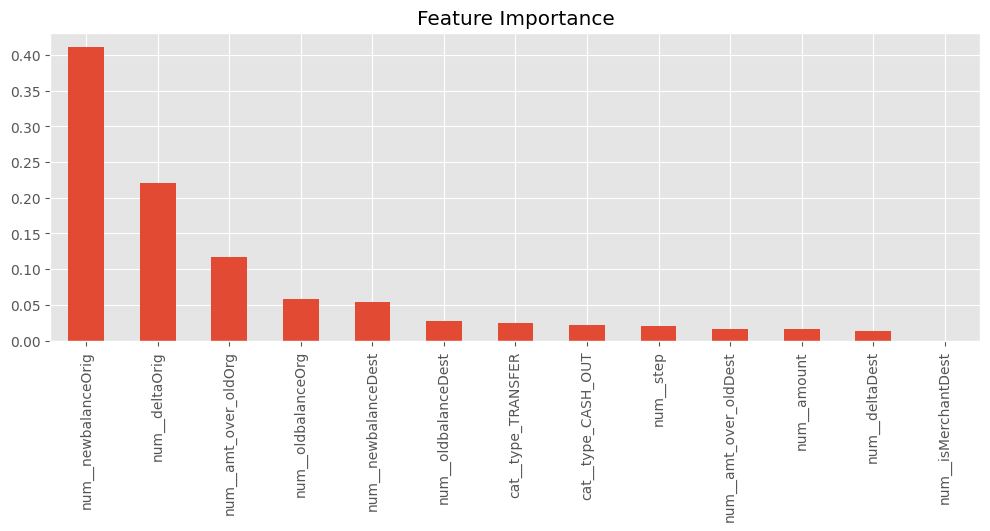

In [110]:
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feat_names = pipe.named_steps['pre'].get_feature_names_out()
    fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    print(fi.head(10))
    fi.plot(kind='bar', figsize=(12,4), title="Feature Importance")
    plt.show()

Why these features make sense:

1. newbalanceOrig (Sender’s new balance after transaction)

*     In fraud cases, fraudsters often drain accounts to near zero.
*     A sudden drop to 0 or negative balance is a red flag.
*     A sudden drop to 0 or negative balance is a red flag.
*     That’s why this is the most important feature.





2. deltaOrig (Change in origin balance)

*     Large, unusual changes in balance are suspicious.
*     Fraudulent transactions often involve high-amount sudden transfers.

3. amt_over_oldOrg (Transaction amount vs. previous balance)

*     Checks if the amount is unusually high compared to account history.
*     Fraud often involves amounts larger than typical transactions.

4. oldbalanceOrig / newbalanceDest / oldbalanceDest

These reflect how money moves between sender and receiver.

*     In fraud, receivers often have empty accounts that suddenly get big deposits.
*     Most fraud happens via TRANSFER or CASH_OUT, not via PAYMENTS or other small movements.

5. type_TRANSFER / type_CASH_OUT


*     Fraudsters transfer money and then immediately cash out.
*     step (time step of transaction)
*     Fraud may cluster at certain times (e.g., night, weekends).
*     Patterns across time matter, but less important than amounts/balances.




## 9) Plots: Precision–Recall curve & F1 vs threshold

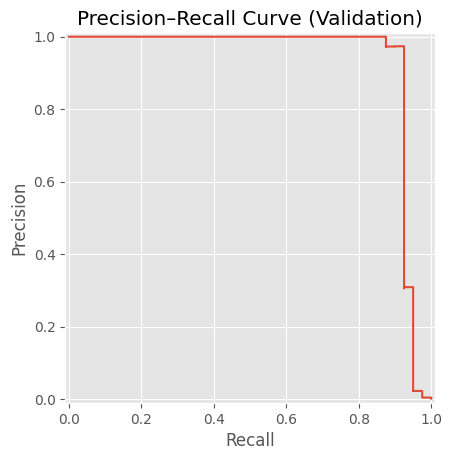

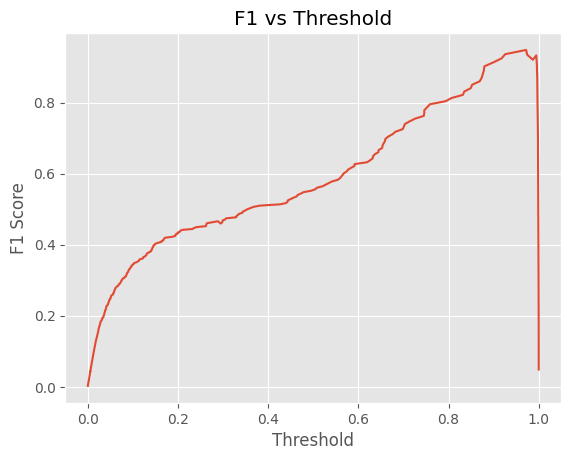

In [111]:

# PR curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision–Recall Curve (Validation)")
plt.show()

# F1 vs threshold
plt.figure()
plt.plot(thresholds, f1_scores[:-1])
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 vs Threshold")
plt.show()


## 10) Save trained model

In [112]:

import joblib
ARTIFACT_DIR = '/mnt/data/fraud_artifacts'
os.makedirs(ARTIFACT_DIR, exist_ok=True)

model_path = os.path.join(ARTIFACT_DIR, 'fraud_model.joblib')
joblib.dump(pipe, model_path)

print("Saved model to:", model_path)


Saved model to: /mnt/data/fraud_artifacts/fraud_model.joblib


## 11) Inference helper

In [113]:

def predict_proba_batch(df_batch, model_path=model_path):
    pipe = joblib.load(model_path)
    # Apply same transforms as training FE step:
    d = df_batch.copy()
    d = d[d['type'].isin(['TRANSFER','CASH_OUT'])].copy()
    d['deltaOrig'] = d['oldbalanceOrg'] - d['newbalanceOrig'] - d['amount']
    d['deltaDest'] = d['newbalanceDest'] - d['oldbalanceDest'] - d['amount']
    d['amt_over_oldOrg'] = d['amount'] / (d['oldbalanceOrg'].replace(0, np.nan))
    d['amt_over_oldDest'] = d['amount'] / (d['oldbalanceDest'].replace(0, np.nan))
    d['amt_over_oldOrg'] = d['amt_over_oldOrg'].fillna(0).replace([np.inf, -np.inf], 0)
    d['amt_over_oldDest'] = d['amt_over_oldDest'].fillna(0).replace([np.inf, -np.inf], 0)
    d['isMerchantDest'] = d['nameDest'].astype(str).str.startswith('M').astype(int)
    for c in ['nameOrig','nameDest']:
        if c in d.columns:
            d.drop(columns=c, inplace=True)
    feature_cols_num = [c for c in d.columns if c not in ['isFraud','type','isFlaggedFraud'] and np.issubdtype(d[c].dtype, np.number)]
    feature_cols_cat = ['type'] if 'type' in d.columns else []
    X = d[feature_cols_num + feature_cols_cat]
    return pipe.predict_proba(X)[:,1]

# Example:
# sample_scores = predict_proba_batch(df.sample(100, random_state=0))
# sample_scores[:5]


# Fraud Prevention Recommendations (Q7)

- Monitor high-value TRANSFER & CASH_OUT transactions closely.  
- Flag abnormal balance deltas  
- Tighten controls for merchant destinations.  
- Set stricter thresholds for unusually large ratios (amount >> old balance).  

 # Measuring Effectiveness (Q8)

To check if prevention strategies work:  
- Compare fraud rates before and after implementing controls.  
- Track precision and recall of fraud detection over time.  
- Run A/B tests: apply new rules to one group and compare fraud caught vs missed with a control group.  
- Monitor customer complaints to ensure false positives remain acceptable.  

# Conclusion

- Fraud is concentrated in TRANSFER and CASH_OUT transactions.  
- Strong predictors are abnormal balance deltas, high transaction-to-balance ratios, and merchant destination flags.  
- The model achieves strong PR-AUC with balanced precision/recall at the chosen threshold.  
- Combining ML with business rules can significantly reduce fraud risk.  